In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
heartdisease = pd.read_csv("heartdisease.csv")

In [3]:
heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [4]:
heartdisease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [5]:
heartdisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


In [6]:
heartdisease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

heartdisease['sick'] = labelencoder.fit_transform(heartdisease['sick'])
heartdisease

# 0 = not sick
# 1 = sick

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,1


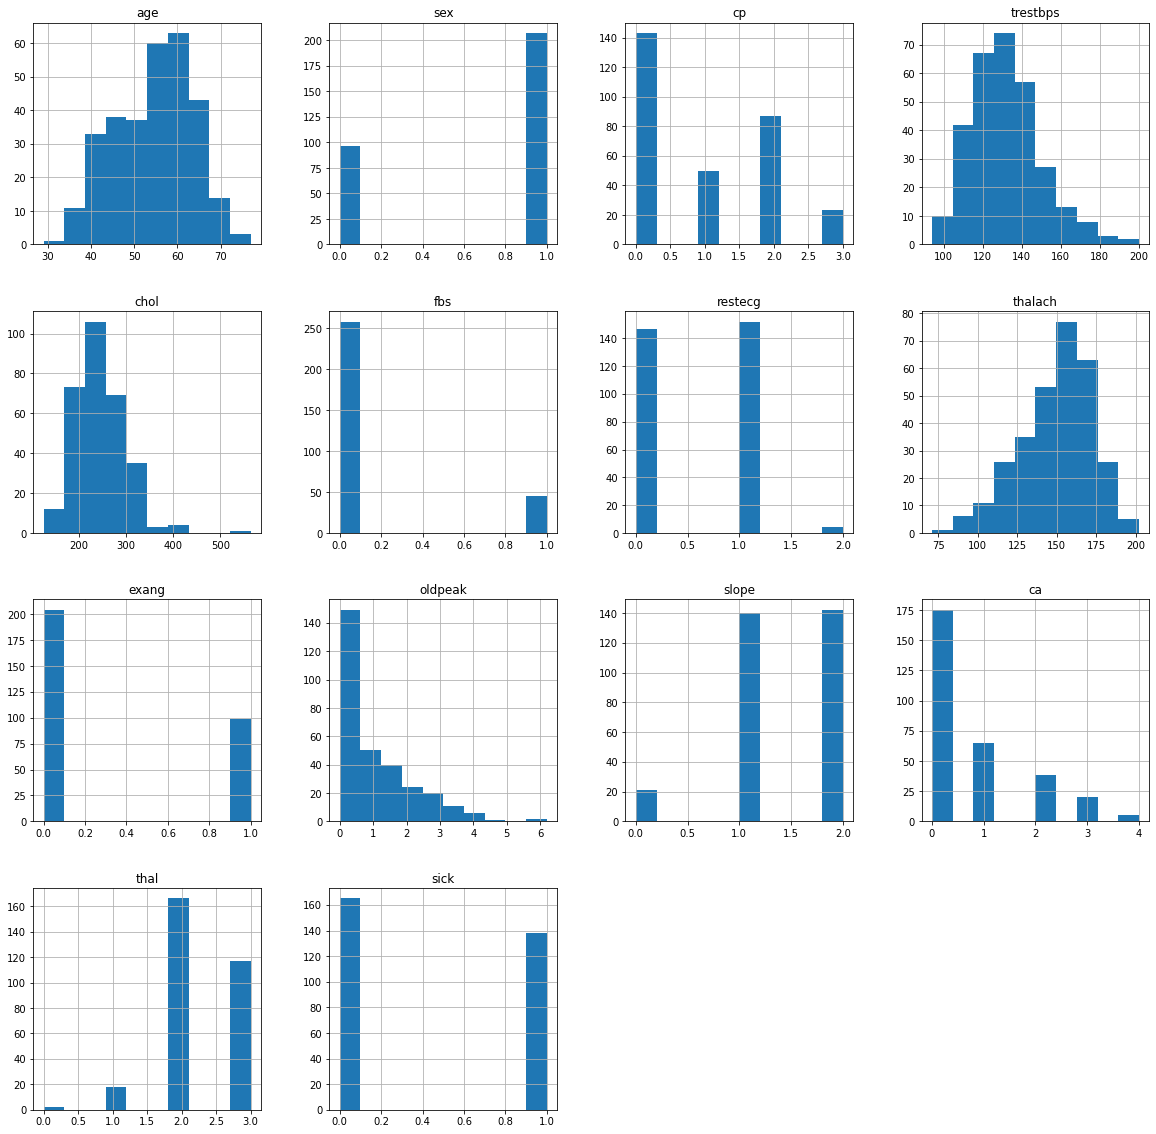

In [8]:
histplots = heartdisease.hist(figsize=(20,20))

In [9]:
print("The number of sick patients:") 
(heartdisease['sick'] == 1).sum() # number of sick

The number of sick patients:


138

In [10]:
print("The number of healthy patients:") 
(heartdisease['sick'] == 0).sum() # number of not sick

The number of healthy patients:


165

<AxesSubplot:>

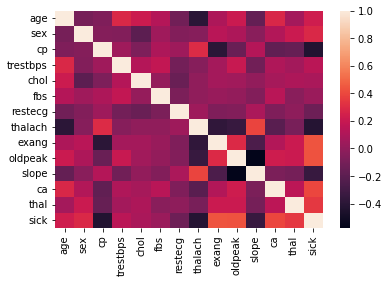

In [11]:
sns.heatmap(heartdisease.corr())

In [12]:
sick_array = heartdisease['sick']
heartdisease = heartdisease.drop(columns = ['sick'])
heartdisease.head() # show column dropped

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
from sklearn.model_selection import train_test_split

#split data with the heart disease df as x and the sick array 
xdata_train, xdata_test, ydata_train, ydata_test = train_test_split(heartdisease, sick_array, 
                                                                    test_size = 0.20, shuffle = True)

In [14]:
print (xdata_train.shape, ydata_train.shape)
print (xdata_test.shape, ydata_test.shape)

(242, 13) (242,)
(61, 13) (61,)


In [15]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

neighbormodel = KNeighborsClassifier()          # default num of neighbors = 5
neighbormodel.fit(xdata_train, ydata_train)     # using train data for model

KNeighborsClassifier()

In [16]:
test_accuracy = neighbormodel.score(xdata_test, ydata_test)
print("The accuracy of the model for the test data is:" , test_accuracy)

The accuracy of the model for the test data is: 0.5901639344262295


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [18]:
# Pipeline my test data

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

num_features = list(xdata_train)

pipeline = ColumnTransformer([ ("num", num_pipeline, num_features) ])

heartdisease_prepared_train = num_pipeline.fit_transform(xdata_train) ## train prep becomes array
heartdisease_prepared_train # shape of (242, 13) matches

array([[ 2.47338048, -1.50674161,  0.94530822, ..., -0.58924894,
        -0.71269665, -0.47539787],
       [ 1.11018122, -1.50674161, -0.97708328, ...,  1.01297851,
        -0.71269665, -0.47539787],
       [-1.27541749, -1.50674161, -0.97708328, ..., -0.58924894,
        -0.71269665,  1.14497234],
       ...,
       [-2.86581663,  0.6636838 , -0.01588753, ...,  1.01297851,
        -0.71269665, -0.47539787],
       [ 0.54218152,  0.6636838 , -0.97708328, ..., -0.58924894,
         1.24721913, -2.09576809],
       [-0.59381786,  0.6636838 ,  0.94530822, ...,  1.01297851,
         2.22717702, -0.47539787]])

In [19]:
heartdisease_prepared_test = num_pipeline.transform(xdata_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

neighbormodel = KNeighborsClassifier()
neighbormodel.fit(heartdisease_prepared_test, ydata_test)     
neighbormodel.score(heartdisease_prepared_test, ydata_test)

0.8852459016393442

In [22]:
values = [1,2,3,5,7,9,10,20,50]

for x in values:
    neighbormodel = KNeighborsClassifier(x)
    neighbormodel.fit(heartdisease_prepared_test, ydata_test)
    print("The accuracy of the test data when there are k =", x, "neighbors is:",
    neighbormodel.score(heartdisease_prepared_test, ydata_test))

The accuracy of the test data when there are k = 1 neighbors is: 1.0
The accuracy of the test data when there are k = 2 neighbors is: 0.819672131147541
The accuracy of the test data when there are k = 3 neighbors is: 0.9016393442622951
The accuracy of the test data when there are k = 5 neighbors is: 0.8852459016393442
The accuracy of the test data when there are k = 7 neighbors is: 0.8524590163934426
The accuracy of the test data when there are k = 9 neighbors is: 0.819672131147541
The accuracy of the test data when there are k = 10 neighbors is: 0.8032786885245902
The accuracy of the test data when there are k = 20 neighbors is: 0.7868852459016393
The accuracy of the test data when there are k = 50 neighbors is: 0.7213114754098361


In [23]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [24]:
# Logistic Regression

logregmodel = LogisticRegression()
logregmodel.fit(heartdisease_prepared_train, ydata_train)

predicted = logregmodel.predict(heartdisease_prepared_test)


print("Accuracy:", metrics.accuracy_score(ydata_test, predicted))
print("Precision:", metrics.precision_score(ydata_test, predicted))
print("Recall:", metrics.recall_score(ydata_test, predicted))
print("F1 Score:", metrics.f1_score(ydata_test, predicted))

Accuracy: 0.819672131147541
Precision: 0.9545454545454546
Recall: 0.6774193548387096
F1 Score: 0.7924528301886793


In [25]:
# Logistic Regression
logregmodel = LogisticRegression(solver = 'sag', max_iter = 100, penalty = 'none')
logregmodel.fit(heartdisease_prepared_train, ydata_train)

predicted = logregmodel.predict(heartdisease_prepared_test)


print("Accuracy:", metrics.accuracy_score(ydata_test, predicted))
print("Precision:", metrics.precision_score(ydata_test, predicted))
print("Recall:", metrics.recall_score(ydata_test, predicted))
print("F1 Score:", metrics.f1_score(ydata_test, predicted))

Accuracy: 0.819672131147541
Precision: 0.9545454545454546
Recall: 0.6774193548387096
F1 Score: 0.7924528301886793


In [26]:
logregmodel = LogisticRegression(solver = 'liblinear', max_iter = 100, penalty = 'l1')
logregmodel.fit(heartdisease_prepared_train, ydata_train)

predicted = logregmodel.predict(heartdisease_prepared_test)


print("Accuracy:", metrics.accuracy_score(ydata_test, predicted))
print("Precision:", metrics.precision_score(ydata_test, predicted))
print("Recall:", metrics.recall_score(ydata_test, predicted))
print("F1 Score:", metrics.f1_score(ydata_test, predicted))

Accuracy: 0.8524590163934426
Precision: 0.9583333333333334
Recall: 0.7419354838709677
F1 Score: 0.8363636363636364


In [27]:
# SVM
from sklearn.svm import SVC

svmmodel = SVC(probability = True)
svmmodel.fit(heartdisease_prepared_train, ydata_train)

SVC(probability=True)

In [28]:
predicted = svmmodel.predict(heartdisease_prepared_test)

print("Accuracy:", metrics.accuracy_score(ydata_test, predicted))
print("Precision:", metrics.precision_score(ydata_test, predicted))
print("Recall:", metrics.recall_score(ydata_test, predicted))
print("F1 Score:", metrics.f1_score(ydata_test, predicted))

Accuracy: 0.8032786885245902
Precision: 0.9130434782608695
Recall: 0.6774193548387096
F1 Score: 0.7777777777777777


In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion Matrix:")

print(metrics.confusion_matrix(ydata_test,predicted))

Confusion Matrix:
[[28  2]
 [10 21]]


Text(33.0, 0.5, 'Predicted Values')

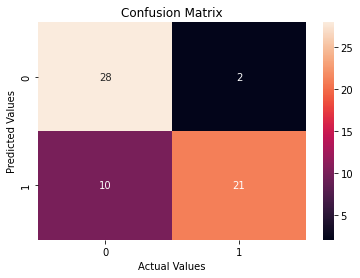

In [30]:
# (plot_confusion_matrix was said to be deprecated, so I decided to do it using 
#the Seaborn library, since it serves the same purpose)

import seaborn as sns
sns.heatmap(metrics.confusion_matrix(ydata_test,predicted), annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

/Users/akmuftuoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/akmuftuoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


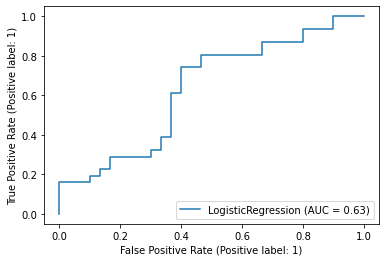

In [31]:
from sklearn.metrics import plot_roc_curve

roc_curve = plot_roc_curve(logregmodel, xdata_test, ydata_test)
plt.show()

In [32]:
# SVM

from sklearn.svm import SVC

svmmodel = SVC(kernel = 'linear')
svmmodel.fit(heartdisease_prepared_train, ydata_train)

SVC(kernel='linear')

In [33]:
predicted = svmmodel.predict(heartdisease_prepared_test)

print("Accuracy:", metrics.accuracy_score(ydata_test, predicted))
print("Precision:", metrics.precision_score(ydata_test, predicted))
print("Recall:", metrics.recall_score(ydata_test, predicted))
print("F1 Score:", metrics.f1_score(ydata_test, predicted))

Accuracy: 0.819672131147541
Precision: 0.9545454545454546
Recall: 0.6774193548387096
F1 Score: 0.7924528301886793


Text(33.0, 0.5, 'Predicted Values')

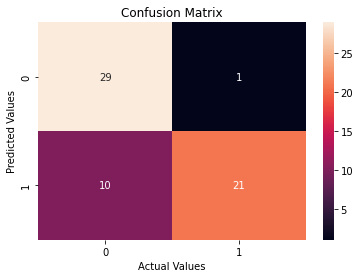

In [34]:
sns.heatmap(metrics.confusion_matrix(ydata_test,predicted), annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

/Users/akmuftuoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/akmuftuoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


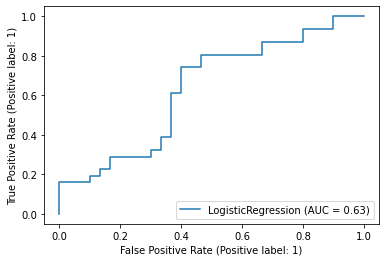

In [35]:
roc_curve = plot_roc_curve(logregmodel, xdata_test, ydata_test)
plt.show()